In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [ ]:
from tensorflow.keras.layers import Flatten, Conv2D, Dense, Input, Dropout
from tensorflow.keras.models import Model

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(X_train, Y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train, x_test = X_train / 255.0, x_test / 255.0

In [ ]:
print('shape of training data', X_train.shape)
print(Y_train.shape)

shape of training data (60000, 28, 28)
(60000,)


In [ ]:
k = len(set(Y_train))
print('number of output nodes', k)

number of output nodes 10


In [ ]:
import numpy as np

X_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(x_test, -1)
print(X_train.shape)


(60000, 28, 28, 1)


In [ ]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32,(3,3), strides=2, activation='relu')(i)
x = Conv2D(64,(3,3), strides=2, activation='relu')(x)
x = Conv2D(128,(3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)


In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
r = model.fit(X_train, Y_train, validation_data=(x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5243 - accuracy: 0.8073 - val_loss: 0.4194 - val_accuracy: 0.8471
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3578 - accuracy: 0.8671 - val_loss: 0.3586 - val_accuracy: 0.8678
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3061 - accuracy: 0.8859 - val_loss: 0.3391 - val_accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2719 - accuracy: 0.8975 - val_loss: 0.3024 - val_accuracy: 0.8892
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2400 - accuracy: 0.9099 - val_loss: 0.3157 - val_accuracy: 0.8828
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2178 - accuracy: 0.9186 - val_loss: 0.3116 - val_accuracy: 0.8928
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1923 - accuracy: 0.9269 - val_loss: 0.3051 -

<function matplotlib.pyplot.legend>

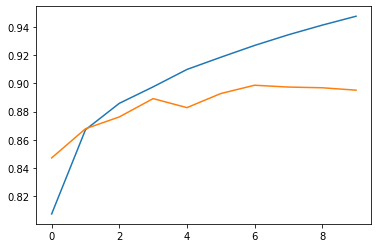

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend

In [ ]:
predictions = model.predict(x_test)
predictions = predictions.argmax(axis = 1)

In [ ]:
tf.math.confusion_matrix(y_test, predictions)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[880,   0,  21,  11,   4,   1,  75,   0,   8,   0],
       [  1, 974,   0,  18,   1,   0,   4,   0,   2,   0],
       [ 22,   1, 861,  10,  53,   0,  53,   0,   0,   0],
       [ 18,   3,  19, 911,   9,   0,  40,   0,   0,   0],
       [  1,   1,  74,  52, 807,   0,  64,   0,   1,   0],
       [  1,   0,   1,   1,   0, 963,   0,  25,   2,   7],
       [134,   1,  81,  21,  94,   0, 657,   0,  12,   0],
       [  0,   0,   0,   0,   0,   5,   0, 989,   0,   6],
       [  3,   1,   2,   5,   3,   2,   9,   3, 972,   0],
       [  0,   0,   0,   0,   0,   4,   1,  56,   1, 938]], dtype=int32)>

In [ ]:
labels = {0: 'Tshirt/Top', 1:'Trouser', 2:'pullover', 3:'Dress', 4:'coat', 5:'sandal', 6:'shirt', 7:'sneaker', 8:'bag', 9:'ankleboot'}
labels[5]


'shirt'

In [ ]:
misclassified_id = np.where(y_test != predictions)[0]
print(misclassified_id)
print(len(misclassified_id))

[   7   23   25 ... 9969 9972 9991]
1048


predicted: Dress   Real: pullover


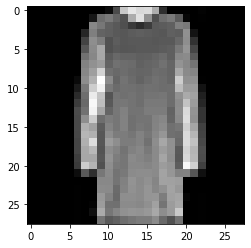

In [ ]:
i = np.random.choice(misclassified_id)
x_test_gray = np.mean(x_test, axis = -1)
plt.imshow(x_test_gray[i], cmap = 'gray')
print('predicted:', labels[predictions[i]], '  Real:', labels[y_test[i]])

In [ ]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)